In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import GMM
from statsmodels.sandbox.regression.gmm import GMM, NonlinearIVGMM, LinearIVGMM
import statsmodels.api as sm
#set seaborn graphics
sns.set()
import warnings
warnings.filterwarnings('ignore')

# SPF data 

In [2]:
pathdata = os.getcwd()+'/Data'
os.chdir(pathdata)
df_infl = pd.read_pickle('infl_data.pkl')
df_gdp = pd.read_pickle('gdp_data.pkl')
df_unr = pd.read_pickle('un_data.pkl')

In [3]:
df_infl = df_infl.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
df_gdp = df_gdp.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
df_unr = df_unr.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])

In [4]:
def get_diff_dataframe(df):
    for eachcol in df.columns.to_list()[2:]:
        df[eachcol] = df[eachcol].astype(float)  
    return df.groupby(['Source', 'SurveyDate']).mean().diff()    

In [5]:
dfinfl_panel = get_diff_dataframe(df_infl)
dfgdp_panel = get_diff_dataframe(df_gdp)
dfunr_panel = get_diff_dataframe(df_unr)


In [6]:
df1 = dfinfl_panel.groupby('SurveyDate').mean()
df1 = df1[(df1.index>'2002-01-01')&(df1.index<'2014-01-01')]

df2 = dfgdp_panel.groupby('SurveyDate').mean()
df2 = df2[(df2.index>'2002-01-01')&(df2.index<'2014-01-01')]

df3 = dfunr_panel.groupby('SurveyDate').mean()
df3 = df3[(df3.index>'2002-01-01')&(df3.index<'2014-01-01')]

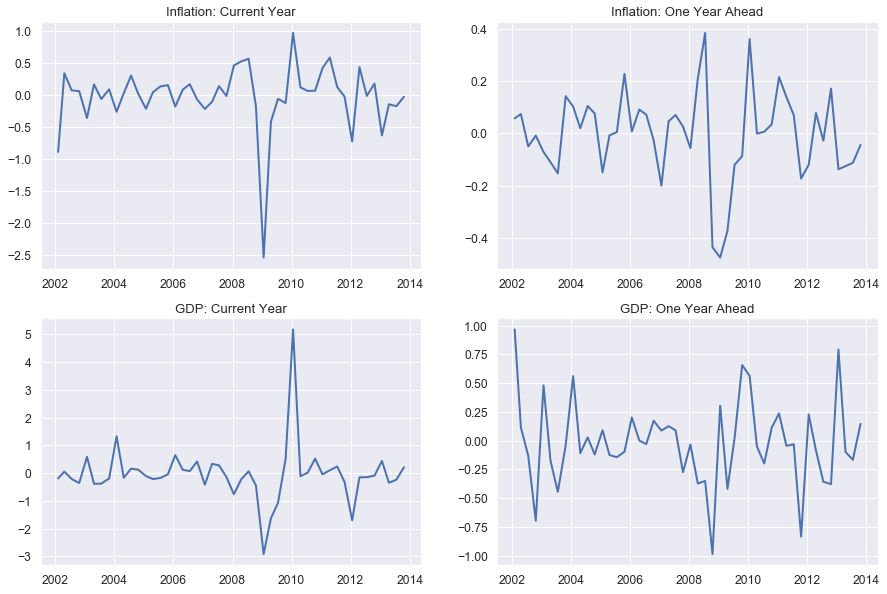

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.1)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
axs[0, 0].plot(df1['Current Year'], linewidth=2.0)
axs[0, 0].set_title('Inflation: Current Year')
axs[0, 1].plot(df1['One Year Ahead'], linewidth=2.0)
axs[0, 1].set_title('Inflation: One Year Ahead')
axs[1, 0].plot(df2['Current Year'], linewidth=2.0)
axs[1, 0].set_title('GDP: Current Year')
axs[1, 1].plot(df2['One Year Ahead'], linewidth=2.0)
axs[1, 1].set_title('GDP: One Year Ahead');

In [8]:
def quantgraphs(df, var):
    df1 = df[[var]]
    df1 = df1.reset_index()
    df1 = df1.loc[(df1['SurveyDate']>'2002-01-01')&(df1['SurveyDate']<'2014-01-01')]
    df1 = df1.melt(id_vars = ['Source', 'SurveyDate'], var_name='Horizon', value_name='Forecast Revision')
    df1 = df1.pivot(index='SurveyDate', columns='Source', values='Forecast Revision')
    return df1

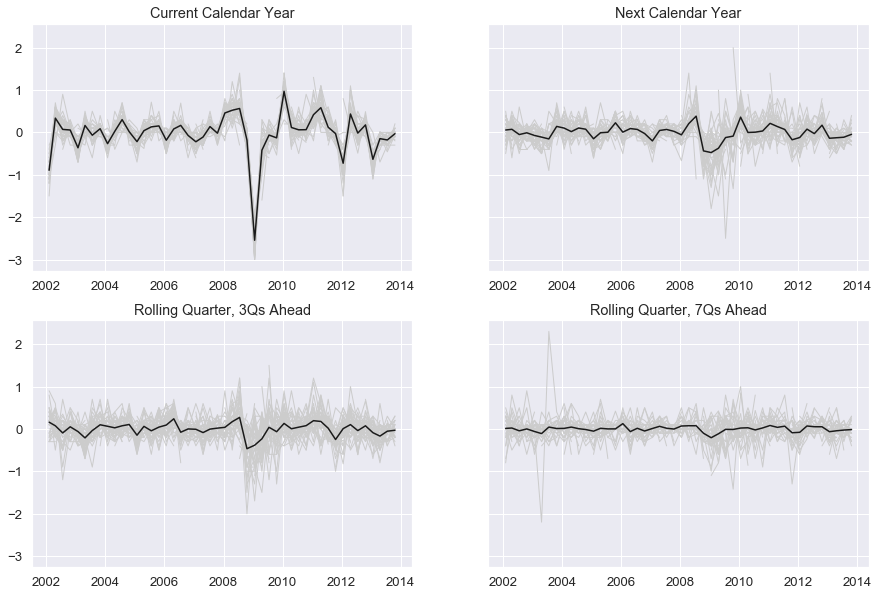

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

df1 = quantgraphs(dfinfl_panel, 'Current Year')
axs[0, 0].plot(df1, color=".8", linewidth=1);
axs[0, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 0].set_title('Current Calendar Year');

df1 = quantgraphs(dfinfl_panel, 'One Year Ahead')
axs[0, 1].plot(df1, color=".8", linewidth=1);
axs[0, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 1].set_title('Next Calendar Year');

df1 = quantgraphs(dfinfl_panel, 'Rolling1')
axs[1, 0].plot(df1, color=".8", linewidth=1);
axs[1, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 0].set_title('Rolling Quarter, 3Qs Ahead');

df1 = quantgraphs(dfinfl_panel, 'Rolling2')
axs[1, 1].plot(df1, color=".8", linewidth=1);
axs[1, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 1].set_title('Rolling Quarter, 7Qs Ahead');

fig.savefig("infl_revision.pdf", bbox_inches='tight')

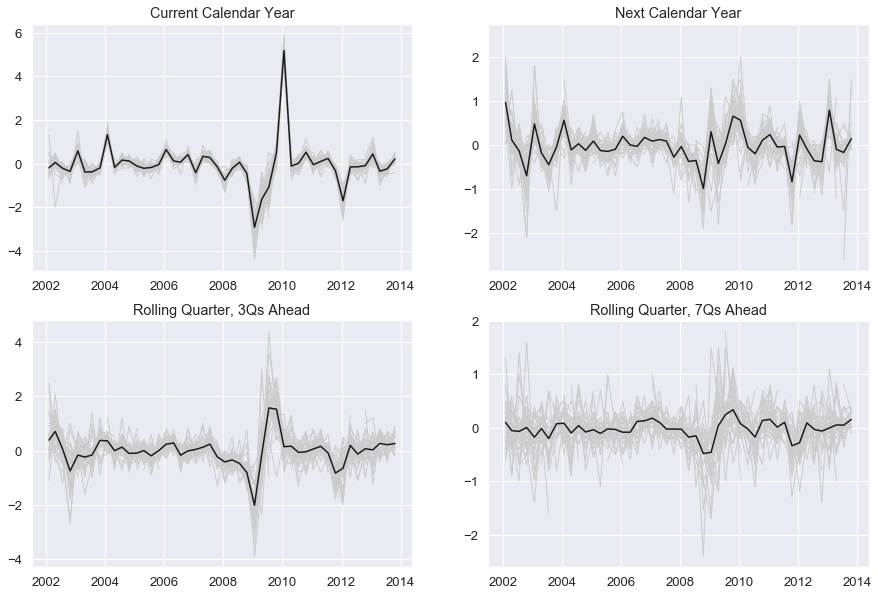

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=False)

df1 = quantgraphs(dfgdp_panel, 'Current Year')
axs[0, 0].plot(df1, color=".8", linewidth=1);
axs[0, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 0].set_title('Current Calendar Year');

df1 = quantgraphs(dfgdp_panel, 'One Year Ahead')
axs[0, 1].plot(df1, color=".8", linewidth=1);
axs[0, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 1].set_title('Next Calendar Year');

df1 = quantgraphs(dfgdp_panel, 'Rolling1')
axs[1, 0].plot(df1, color=".8", linewidth=1);
axs[1, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 0].set_title('Rolling Quarter, 3Qs Ahead');

df1 = quantgraphs(dfgdp_panel, 'Rolling2')
axs[1, 1].plot(df1, color=".8", linewidth=1);
axs[1, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 1].set_title('Rolling Quarter, 7Qs Ahead');

fig.savefig("gdp_revision.pdf", bbox_inches='tight')

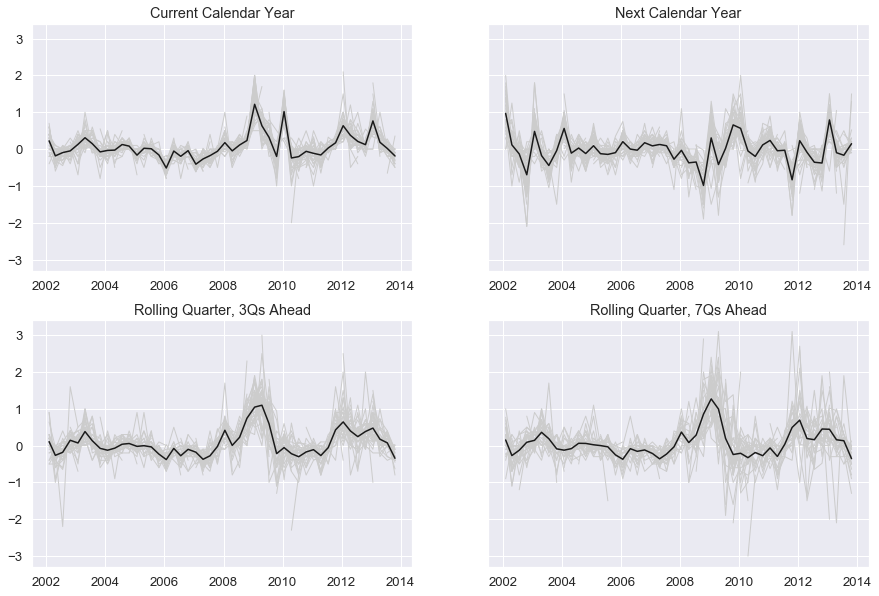

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

df1 = quantgraphs(dfunr_panel, 'Current Year')
axs[0, 0].plot(df1, color=".8", linewidth=1);
axs[0, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 0].set_title('Current Calendar Year');

df1 = quantgraphs(dfgdp_panel, 'One Year Ahead')
axs[0, 1].plot(df1, color=".8", linewidth=1);
axs[0, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 1].set_title('Next Calendar Year');

df1 = quantgraphs(dfunr_panel, 'Rolling1')
axs[1, 0].plot(df1, color=".8", linewidth=1);
axs[1, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 0].set_title('Rolling Quarter, 3Qs Ahead');

df1 = quantgraphs(dfunr_panel, 'Rolling2')
axs[1, 1].plot(df1, color=".8", linewidth=1);
axs[1, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 1].set_title('Rolling Quarter, 7Qs Ahead');

fig.savefig("unr_revision.pdf", bbox_inches='tight')

In [12]:
dfir = pd.read_pickle('PRate.pkl')

In [13]:
dfir1 = get_diff_dataframe(dfir)

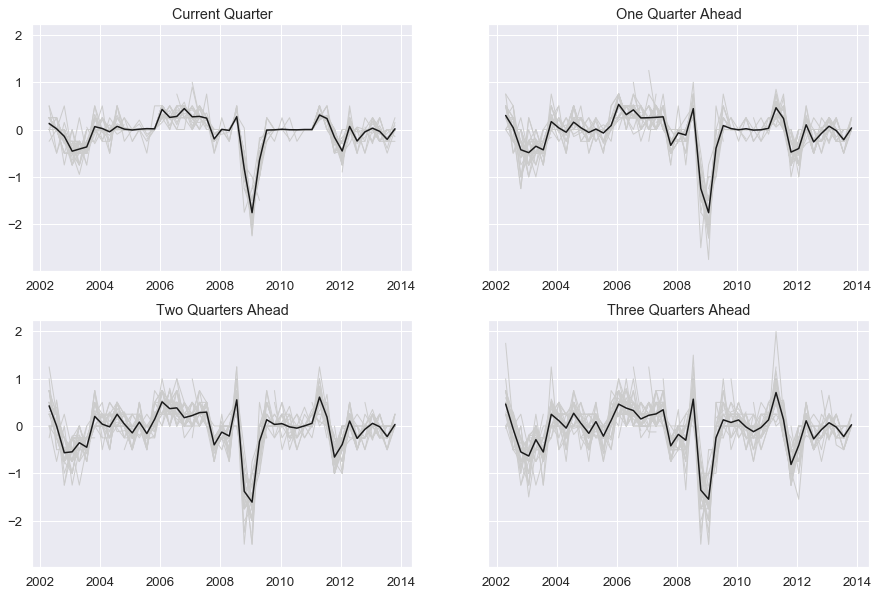

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

df1 = quantgraphs(dfir1, 'CurrentIR')
axs[0, 0].plot(df1, color=".8", linewidth=1);
axs[0, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 0].set_title('Current Quarter');

df1 = quantgraphs(dfir1, 'IRQ1')
axs[0, 1].plot(df1, color=".8", linewidth=1);
axs[0, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[0, 1].set_title('One Quarter Ahead');

df1 = quantgraphs(dfir1, 'IRQ2')
axs[1, 0].plot(df1, color=".8", linewidth=1);
axs[1, 0].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 0].set_title('Two Quarters Ahead');

df1 = quantgraphs(dfir1, 'IRQ3')
axs[1, 1].plot(df1, color=".8", linewidth=1);
axs[1, 1].plot(pd.DataFrame(df1.mean(axis=1)),color=".1", linewidth=1.5);
axs[1, 1].set_title('Three Quarters Ahead');

fig.savefig("ir_revision.pdf", bbox_inches='tight')

In [15]:
dfeonia = pd.read_csv('eonia.csv', skiprows = 4)

In [16]:
dfeonia.columns = ['date', 'Eonia']

In [17]:
dfeonia.index = dfeonia['date']
dfeonia = dfeonia.drop('date', axis = 1)

In [18]:
dfeonia.index = pd.to_datetime(dfeonia.index)

In [19]:
dfeonia = dfeonia.resample('Q').mean()

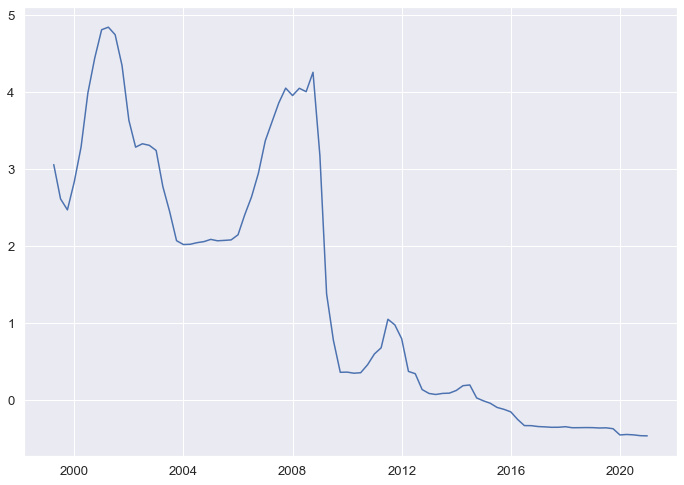

In [20]:
plt.plot(dfeonia)

In [21]:
dfeonia

,Eonia
date,
1999-03-31,3.053651
1999-06-30,2.608615
1999-09-30,2.465758
1999-12-31,2.831385
2000-03-31,3.283538
...,...
2019-12-31,-0.457469
2020-03-31,-0.451547
2020-06-30,-0.456484


In [22]:
dfirm = dfir.groupby('SurveyDate').mean()

In [23]:
dfirm = dfirm.drop('Source', axis = 1)

In [24]:
newdf = pd.concat([dfirm, dfeonia], axis = 1)

In [25]:
dfirm = dfirm[(dfirm.index>'2002-01-01')&(dfirm.index<'2014-01-01')]
dfeonia = dfeonia[(dfeonia.index>'2002-01-01')&(dfeonia.index<'2014-01-01')]

In [26]:
len(dfirm)

48

In [27]:
dfirm['Eonia'] = dfeonia.values

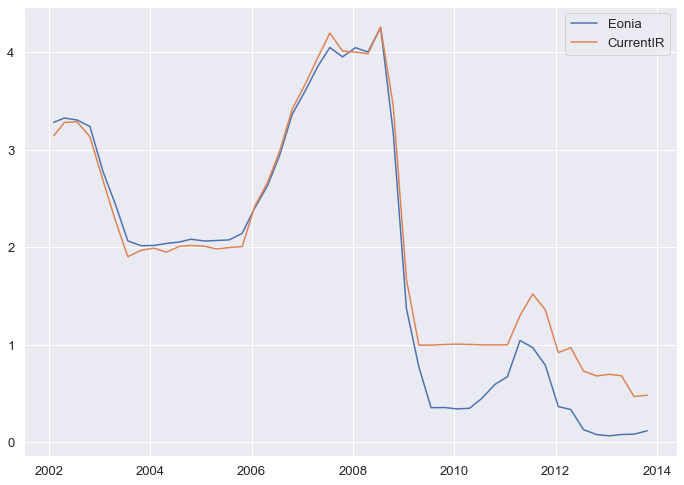

In [28]:
plt.plot(dfirm[['Eonia', 'CurrentIR']]);
plt.legend(['Eonia', 'CurrentIR']);

## altavilla data

In [29]:
oisfactors = pd.read_csv('dataset_con.csv')
oisfactors.index = pd.to_datetime(oisfactors['Date'])
targetf = pd.read_csv('dataset_rel.csv')
targetf.index = pd.to_datetime(targetf['Date'])
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
pcdf = pd.concat([pcdf, oisfactors], axis = 1)
pcdf = pd.concat([pcdf, targetf], axis = 1)
pcdf1 = pcdf.loc[(pcdf.index>'2002-12-01')&(pcdf.index<'2014-01-01')]
#pcdf1 = pcdf1.dropna(subset=['OIS_1M', 'OIS_3M', 'OIS_6M', 'OIS_1Y', 'OIS_2Y', 'OIS_3Y'])

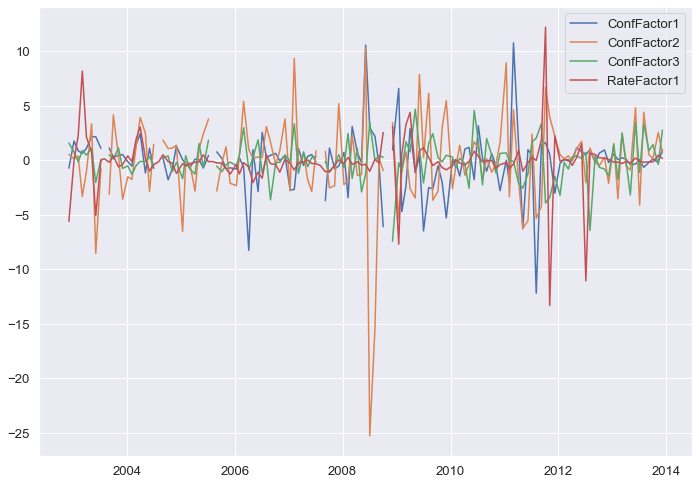

In [30]:
plt.plot(pcdf1[['ConfFactor1', 'ConfFactor2', 'ConfFactor3', 'RateFactor1']])
plt.legend(['ConfFactor1', 'ConfFactor2', 'ConfFactor3', 'RateFactor1'])

In [31]:
dfirm['IRQ1_lagged'] = dfirm['IRQ1'].shift(1)#'CurrentIR'
dfirm['One Quarter Ahead Revision'] = dfirm['CurrentIR'] - dfirm['IRQ1_lagged']
dfirm['IRQ3_lagged'] = dfirm['IRQ3'].shift(1)#
dfirm['Three Quarters Ahead Revision'] = dfirm['IRQ2'] - dfirm['IRQ3_lagged']
dfirm['IRQ2_lagged'] = dfirm['IRQ2'].shift(1)#
dfirm['Two Quarters Ahead Revision'] = dfirm['IRQ1'] - dfirm['IRQ2_lagged']

In [32]:
data1 = pd.merge_asof(dfirm, pcdf, left_index=True, right_index = True,
                       direction='backward')

In [33]:
data1 = data1.rename(columns={'RateFactor1':'Target','ConfFactor1':'Timing', 'ConfFactor2':'Forward Guidance'})

KeyError: 'One Quarter Revision'

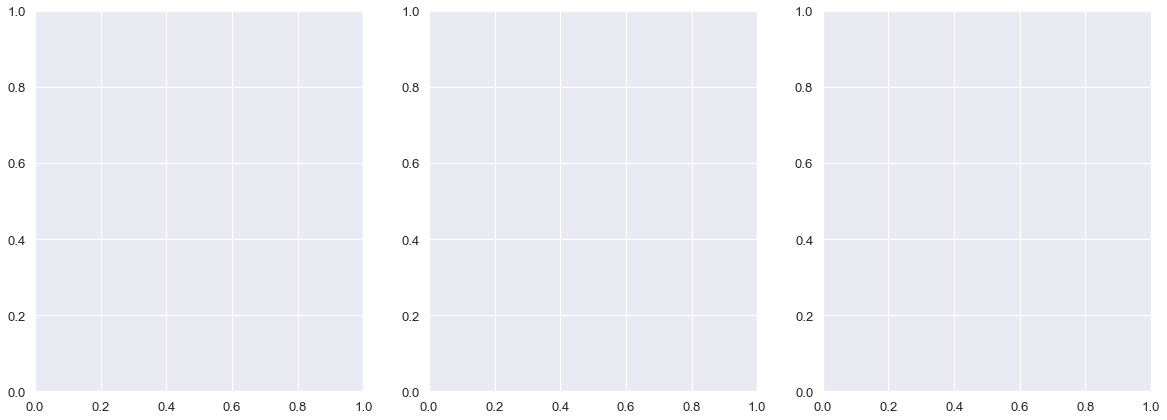

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.2)
fig, axs = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

sns.regplot(x = 'Target', y = 'One Quarter Revision', data = data1, robust = True, ci = None, ax = axs[0]);
sns.regplot(x = 'Timing', y = 'One Quarter Revision', data = data1, robust = True, ci = None, ax = axs[1]);
sns.regplot(x = 'Forward Guidance', y = 'One Quarter Revision', data = data1, robust = True, ci = None, ax = axs[2]);

In [35]:
data1[['Target', 'Timing', 'Forward Guidance']].describe()

,Target,Timing,Forward Guidance
count,47.000000,47.000000,47.000000
mean,0.014664,0.349366,-0.792470
std,2.884627,2.198595,4.591172
min,-11.045993,-8.248158,-25.262613
25%,-0.366376,-0.097130,-2.129528
50%,-0.116754,0.450707,-0.521092
75%,0.262261,1.126065,0.932440
max,12.223634,6.599281,8.944877


In [36]:
import scipy.stats as stats

In [37]:
stats.kurtosis(data1['Forward Guidance'].dropna())

15.71414064806612

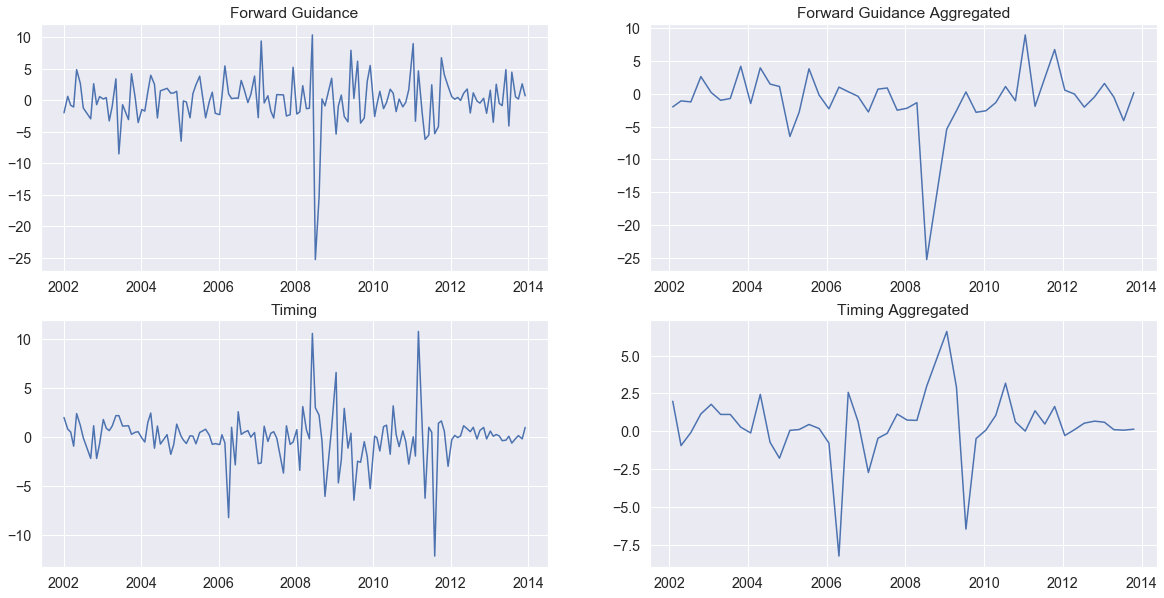

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.3)
fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharey=False)

ax[0, 1].plot(data1['Forward Guidance'].dropna())
ax[0, 1].set_title('Forward Guidance Aggregated')
ax[0, 0].plot(pcdf['ConfFactor2'].loc[(pcdf.index>'2002-01-01')&(pcdf.index<'2014-01-01')].dropna())
ax[0, 0].set_title('Forward Guidance')

ax[1, 1].plot(data1['Timing'].dropna())
ax[1, 1].set_title('Timing Aggregated')
ax[1, 0].plot(pcdf['ConfFactor1'].loc[(pcdf.index>'2002-01-01')&(pcdf.index<'2014-01-01')].dropna())
ax[1, 0].set_title('Timing');

fig.savefig("factors.pdf", bbox_inches='tight')

In [115]:
dfecb = pd.read_pickle('ecbh_diff.pkl')

In [116]:
dfecb.columns = ['ECB Current Year', 'ECB Next Calendar Year', 'ECB Two Years Ahead']

In [117]:
dfecb = dfecb.sort_index()

In [118]:
dfecb.loc[dfecb.index>'2008-01-01']

,ECB Current Year,ECB Next Calendar Year,ECB Two Years Ahead
Unnamed: 0,,,
2008-03-01,8.000000e-01,-4.000000e-01,NaN
2008-06-01,5.000000e-01,3.000000e-01,NaN
2008-09-01,1.000000e-01,2.000000e-01,NaN
2008-12-01,-2.000000e-01,-1.200000e+00,NaN
2009-03-01,-2.900000e+00,-4.000000e-01,NaN
2009-06-01,-1.000000e-01,0.000000e+00,NaN
2009-09-01,1.000000e-01,2.000000e-01,NaN
2009-12-01,-1.000000e-01,1.000000e-01,NaN
2010-03-01,9.000000e-01,2.000000e-01,NaN


In [119]:
df1 = dfinfl_panel.reset_index().groupby('SurveyDate').mean()


In [120]:
data1 = pd.merge_asof(dfecb, df1, left_index=True, right_index = True,
                       direction='backward')
#dfhicp = pd.concat([dfecb, df1], axis = 1)

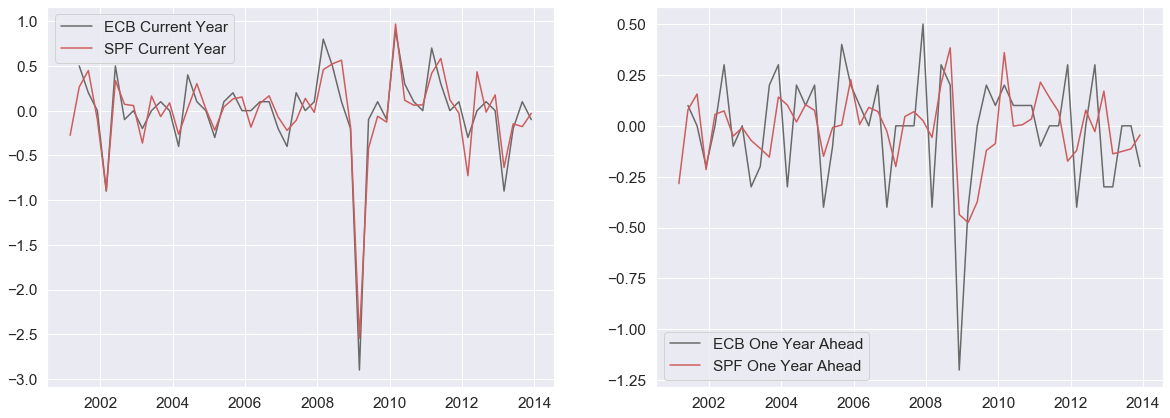

In [121]:
data1 = data1.loc[data1.index<'2014-01-01']
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.4)
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=False)
ax[0].plot(data1['ECB Current Year'], color='dimgrey')
ax[0].plot(data1['Current Year'], color='indianred')
ax[0].legend(['ECB Current Year', 'SPF Current Year']);

ax[1].plot(data1['ECB Next Calendar Year'], color='dimgrey')
ax[1].plot(data1['One Year Ahead'], color='indianred')
ax[1].legend(['ECB One Year Ahead', 'SPF One Year Ahead']);
fig.savefig("ecbspfinflation.pdf", bbox_inches='tight')

In [92]:
dfecb = pd.read_pickle('ecb_diff.pkl')
dfecb.columns = ['ECB Current Year', 'ECB Next Calendar Year', 'ECB Two Years Ahead']
df1 = dfgdp_panel.reset_index().groupby('SurveyDate').mean()
data1 = pd.merge_asof(dfecb, df1, left_index=True, right_index = True,
                       direction='backward')

In [93]:
dfecb

,ECB Current Year,ECB Next Calendar Year,ECB Two Years Ahead
Unnamed: 0,,,
2001-03-01,NaN,NaN,NaN
2001-06-01,-0.4,-0.2,NaN
2001-09-01,-0.9,-0.6,NaN
2001-12-01,-0.1,-0.8,NaN
2002-03-01,-0.5,1.3,NaN
...,...,...,...
2018-12-01,-0.1,-0.1,0.0
2019-03-01,-0.8,-0.1,-0.2
2019-06-01,0.1,-0.2,-0.1


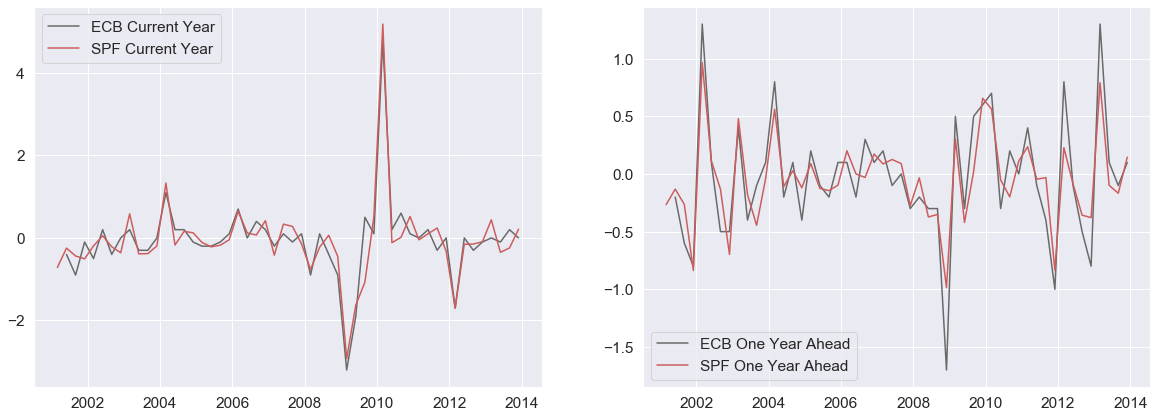

In [94]:
data1 = data1.loc[data1.index<'2014-01-01']
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.4)
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=False)
ax[0].plot(data1['ECB Current Year'], color='dimgrey')
ax[0].plot(data1['Current Year'], color='indianred')
ax[0].legend(['ECB Current Year', 'SPF Current Year']);

ax[1].plot(data1['ECB Next Calendar Year'], color='dimgrey')
ax[1].plot(data1['One Year Ahead'], color='indianred')
ax[1].legend(['ECB One Year Ahead', 'SPF One Year Ahead']);
fig.savefig("ecbspfgdp.pdf", bbox_inches='tight')

In [88]:
dfecb

,ECB Current Year,ECB Next Calendar Year,ECB Two Years Ahead
Unnamed: 0,,,
2001-03-01,-0.174918,-0.030345,NaN
2001-06-01,-0.010000,0.044000,NaN
2001-09-01,0.442000,0.379592,NaN
2001-12-01,0.034259,0.344444,NaN
2002-03-01,0.334833,0.050026,NaN
...,...,...,...
2018-12-01,0.139604,0.102047,-0.145681
2019-03-01,0.427380,-0.104432,-0.013479
2019-06-01,-0.003650,-0.010347,0.043698
